In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For converting Non – Normal Distribution data in Normal Distribution, we use Function Transformer.

In [2]:
dataset =  pd.read_csv(r"C:\Users\Admin\Downloads\loan.csv")

In [4]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
dataset.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_9592\4186998114.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["LoanAmount"])


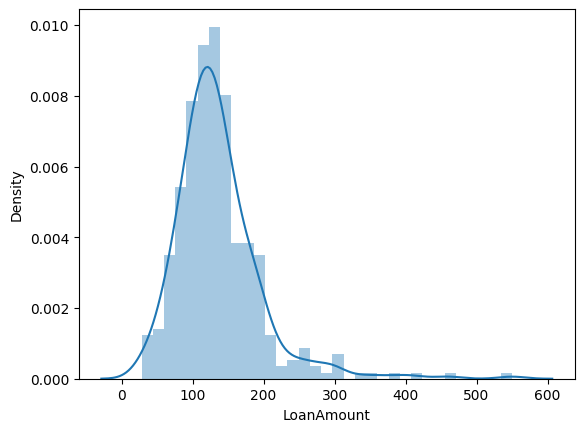

In [7]:
sns.distplot(dataset["LoanAmount"])
plt.show()

In [8]:
q1 = dataset["LoanAmount"].quantile(0.25)
q3 = dataset["LoanAmount"].quantile(0.75)
iqr = q3 - q1

In [9]:
min_r = q1-(1.5*iqr)
max_r = q3+(1.5*iqr)
min_r, max_r

(np.float64(13.625), np.float64(244.625))

# dataset = dataset[dataset["age"]<=max_r]

C:\Users\Admin\AppData\Local\Temp\ipykernel_9592\4186998114.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["LoanAmount"])


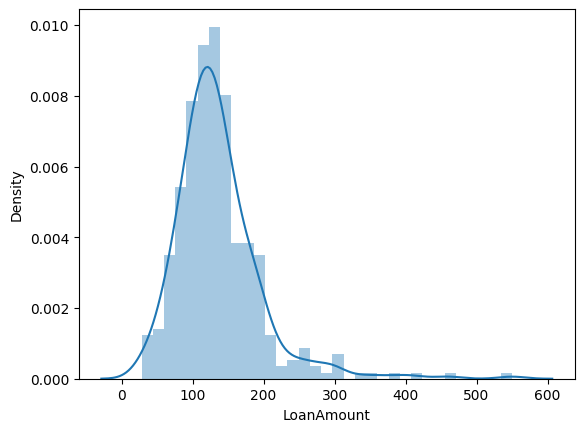

In [10]:
sns.distplot(dataset["LoanAmount"])
plt.show()

In [11]:
from sklearn.preprocessing import FunctionTransformer

In [12]:
ft = FunctionTransformer(func=np.log1p)

In [14]:
ft.fit(dataset[["LoanAmount"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [16]:
ft.transform(dataset[["LoanAmount"]])

,LoanAmount
0,4.709530
1,4.844187
2,5.342334
3,4.615121
4,4.369448
...,...
362,4.736198
363,4.753590
364,4.844187
365,5.068904


In [17]:
dataset["LoanAmount_tf"] = ft.transform(dataset[["LoanAmount"]])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9592\330084526.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["LoanAmount"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_9592\330084526.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["LoanAmount_tf"])


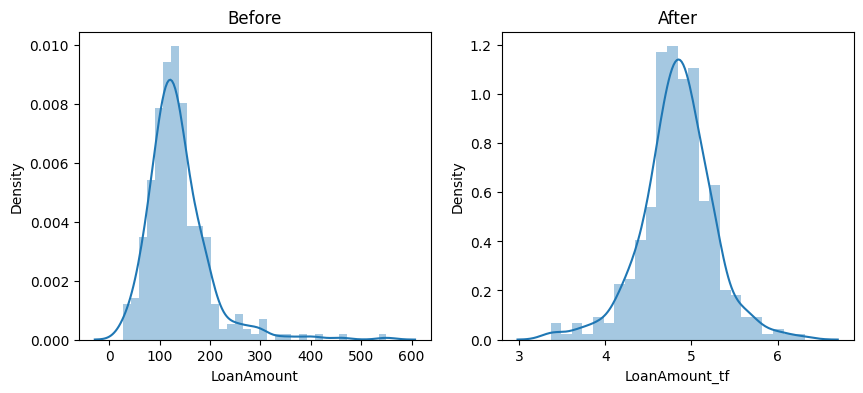

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(dataset["LoanAmount"])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(dataset["LoanAmount_tf"])
plt.title("After")
plt.show()

In [19]:
ft1 = FunctionTransformer(func = lambda x : x**2)
ft1.fit(dataset[["LoanAmount"]])
dataset["LoanAmount_tf1"] = ft1.transform(dataset[["LoanAmount"]])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9592\2964247228.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["LoanAmount"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_9592\2964247228.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["LoanAmount_tf1"])


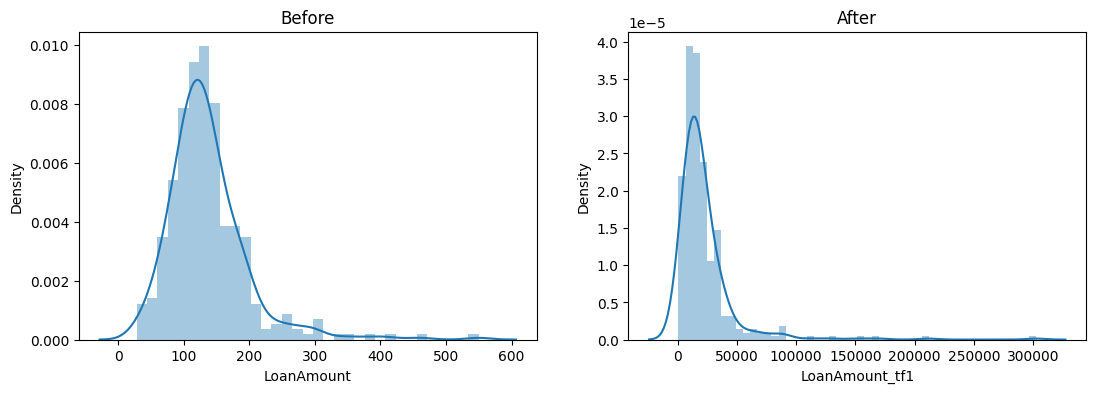

In [22]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.distplot(dataset["LoanAmount"])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(dataset["LoanAmount_tf1"])
plt.title("After")
plt.show()